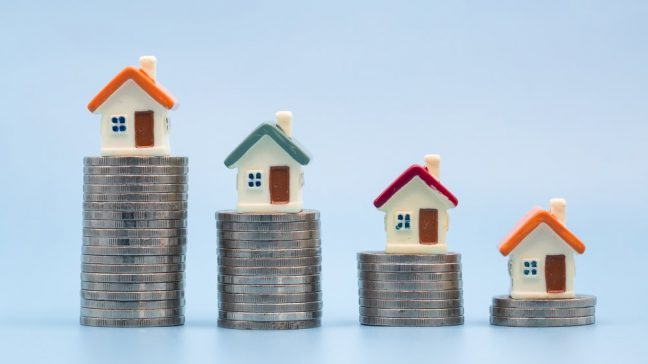

****Hello everyone, this is the first thing that I'm posting on the kaggle. I hope you like it and interact with suggestions.****

****First import libraries****

In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed

import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import skew
from scipy.stats import kurtosis
import warnings
warnings.filterwarnings('ignore')

In [66]:
#Importing Data

train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
train.head()

## Data exploration 

Firstly,an exploration of the data will be carried out following the understandings:


**Understand the problem.** Look at each variable and do a philosophical analysis about their meaning and importance for this problem.

**Univariable study.** Focus on the dependent variable (SalePrice) and try to know a little bit more about it.

**Multivariate study**. Try to understand how the dependent variable and independent variables relate.

**Basic cleaning.** Clean the dataset and handle the missing data, outliers and categorical variables.

**Test assumptions.** Check if our data meets the assumptions required by most multivariate techniques.


In [67]:
train.shape, test.shape

In [68]:
#Firstly, I'm just checking if there is repeated variables (same ID)
#len(set(x)) tell the size of the set of unique elements of x
unique_value = len(set(train.Id))
print(unique_value)

In [69]:
# ckeck the columns
train.columns

****Missing values****

In [70]:
# Let's check for missing data from train dataset
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending=False)
missing_values = pd.concat([total,percent],axis=1,keys=['TOTAL','PERCENT(%)'])
missing_values.head(30)

## Clearing the data

The variable with more then 15% missing values will be deleted:

* 'PoolQC'
* 'MiscFeature'
* 'Alley'
* 'Fence'
* 'FireplaceQu'
* 'LotFrontage'

Some features have the same number of missing values, so this refers to the same observation. Then, it will be considered only one variable for representing the feature. For example:

'GarageCars' will represent the 'GarageType','GarageYrBlt', 'GarageFinish','GarageQual' and 'GarageCond'.

Finally 'Electrical' have only one null value so we replace it with its mode.

In [71]:
# Dropping missing values
# Let's delete variables (columns) with missing values.
train = train.drop((missing_values[missing_values['TOTAL']>=8]).index, 1)

# Let's also fill the only observation missing an 'Electrical' field.
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

# Double check that there no data is missing anymore
train.isnull().sum().max()

In [72]:
# After deleting the columns
train.columns

In [73]:
train.head()

In [74]:
# Let's check for missing data from test dataset.
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()*100).sort_values(ascending=False)

#Let's build a table
missing_values1 = pd.concat([total,percent],axis=1,keys=['TOTAL','PERCENT(%)'])
missing_values1.head(40)

In [75]:
# Deleting features with missing values in the test data as in the train data.
test = test.drop((missing_values1[missing_values1['TOTAL']>4]).index,1)

In [76]:
# missing data from test dataset
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)

#Let's build a table
missing_values1 = pd.concat([total,percent],axis=1,keys=['TOTAL','PERCENT'])
missing_values1.head(40)

In [77]:
test.isnull().sum().max()

For categorical variables and numerical variable we are just filling the Null values with most frequent(mode) from specified columns

In [78]:
null_features = (missing_values1[missing_values1['TOTAL']>0]).index
null_features

In [79]:
for feature in null_features:
        test[feature] = test[feature].fillna(test[feature].mode()[0])

In [80]:
# check again if there is any null values
test.isnull().sum().max()

## ****Analysing SalePrice****

In [81]:
#Descriptive statistics summary
train['SalePrice'].describe()

In [82]:
train.boxplot('SalePrice')

****Scatter plots between 'SalePrice' and correlated variables****

Look the Scatter plot between 'SalePrice' and its correlated Variables

In [83]:
sns.set()
sns.pairplot(train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']], size = 2.5)
plt.show();

In [84]:
# Getting the histogram and normal probability plot
from scipy import stats
from scipy.stats import norm

plt.figure(figsize = (12,6))
sns.distplot(train['SalePrice'], kde = True, hist=True, fit = norm);
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel("House's sale Price in $", fontsize = 12)
#plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt, fit=True, rvalue=True)

What do these graphics tell us?

* Deviate from the normal distribution.
* Have appreciable positive skewness.
* Show peakedness.

In [85]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

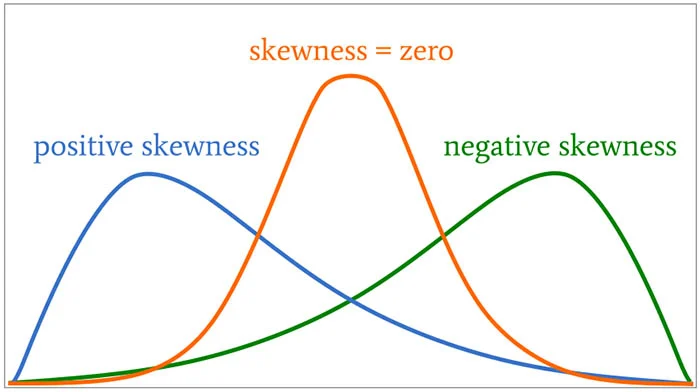

Skewness can be a positive or negative number (or zero). Distributions that are symmetrical with respect to the mean, such as the normal distribution, have zero skewness. A distribution that “leans” to the right has negative skewness, and a distribution that “leans” to the left has positive skewness.

As a general guideline, skewness values that are within ±1 of the normal distribution’s skewness indicate sufficient normality for the use of parametric tests.

We use kurtosis to quantify a phenomenon’s tendency to produce values that are far from the mean. There are various ways to describe the information that kurtosis conveys about a data set: “tailedness” (note that the far-from-the-mean values are in the distribution’s tails), “tail magnitude” or “tail weight,” and “peakedness” (this last one is somewhat problematic, though, because kurtosis doesn’t directly measure peakedness or flatness).

The normal distribution has a kurtosis value of 3. The following diagram gives a general idea of how kurtosis greater than or less than 3 corresponds to non-normal distribution shapes.

More informations about it, click [here](https://www.allaboutcircuits.com/technical-articles/understanding-the-normal-distribution-parametric-tests-skewness-and-kurtosis/)

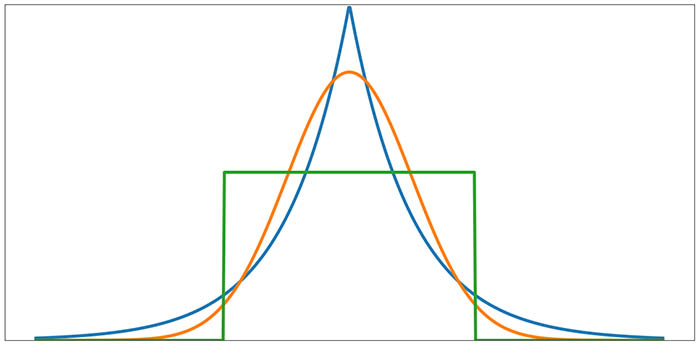

One way to normalize the data is through logarithmic transformation.

In [86]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

In [87]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt, rvalue=True)

In [88]:
#skewness and kurtosis after log transformation
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

## Correlation Matrix (heatmap style)

I plotted a correlation matrix to identify a possible significant correlation between input variables, thus mapping the possibility of multicollinearity, as these variables need to be linearly independent:

In [89]:
#correlation matrix
corrmat = train.corr()
plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

The correlation matrix is the best way to see all the numerical correlation between features. Let's see which are the feature that correlate most with our target variable.

In [90]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [91]:
# most correlated features

top_corr = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(train[top_corr].corr(), annot=True)
top_corr

OverallQual is the variable with the highest correlation with the variable response (SalesPrice). In the chart above, we can see this relationship.

### Relationship with categorical features

In [92]:
Overall_SalePrice = train[['SalePrice', 'OverallQual']]
plt.subplots(figsize = (10, 6))
sns.boxplot(data = train, x = 'OverallQual', y = 'SalePrice')

The relationship seems to be stronger between 'OverallQual' and SalePrice. The box plot shows how sales prices increase with the overall quality.


****Let's analyze the number of ​​categorical and numerical variables****

In [93]:
# Differentiate numerical features (minus the target) and categorical features

categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns

#Separating the dataset in categorical and numerical features
train_num = train[numerical_features]
train_cat = train[categorical_features]

In [94]:
train_cat.shape,train_num.shape

****Let's analyze the skewness of all features****

**Skewness**: distribution asymmetry. 

Closer to 0, the more “perfect” is the asymmetry;

Values ​​> 0 there is a positive asymmetry;

Values ​​< 0 there is a negative asymmetry;

It is also possible to calculate the skewness with a pandas method called skew().

In [95]:
# checkin skewness of all features
skewness = train_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

In [96]:
#Let's fix the features with skewness > 0.5
skewness = skewness[abs(skewness)>0.5]
skewness.index

In [97]:
#we can treat skewness of a feature with the help fof log transformation.so we'll apply the same here.
skewness = np.log1p(skewness)
skewness.sort_values(ascending=False)

In [98]:
train_cat.head()

**Dummy variables¶**

In [99]:
# using get_dummies here it is used for data manipulation. It converts categorical data into dummy or indicator variables
train_cat = pd.get_dummies(train_cat)
train_cat.shape

In [100]:
# concatenating train_num (numerical variable) and train_cat (categorical variable)

train1 = pd.concat([train_cat,train_num],axis=1)
train1.shape

****Skewness of test data****

In [101]:
# differentiate between numerical and categorical varibles
categorical_features = test.select_dtypes(include = ["object"]).columns
numerical_features = test.select_dtypes(exclude = ["object"]).columns

test_num = test[numerical_features]
test_cat = test[categorical_features]

In [102]:
test_num.shape,test_cat.shape

In [103]:
# finding skewness of all features
skewness_test = test_num.apply(lambda x: skew(x))
skewness_test.sort_values(ascending=False)

In [104]:
#we can treat skewness of a feature with the help fof log transformation.so we'll apply the same here.
skewness = np.log1p(skewness)
skewness.sort_values(ascending=False)

In [105]:
test_cat.head()

In [106]:
# we are selecting features where skewness is greater than 0.5 to fix their skewness
#skewness_test = skewness[abs(skewness)>0.5]
#len(skewness_test.index)

Convert categorical variable into dummy/indicator variables.

In [107]:
test_cat = pd.get_dummies(test_cat)
test_cat.head()

Now, after transformation(preprocessing), let's go join them (test_cat + test_num) to get the whole test set back.

In [108]:
test1 = pd.concat([test_cat,test_num],axis=1)
test1.shape

****Outliers****

Let's see if there are many outliers and how to handle this data

In [109]:
#Let's see the outliers in the below scatterplot
plt.scatter(train1.SalePrice,train1.GrLivArea,c = 'blue')
plt.xlabel('GrLivArea', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
#plt.title('View Outliers')
plt.show()

In [110]:
# set minimum and maximum threshold values to detect ouliers using standard deviation
lower = train1['SalePrice'].mean() - 3*train1['SalePrice'].std()
upper = train1['SalePrice'].mean() + 3*train1['SalePrice'].std()
print("Upper: ", upper)
print("Lower: ", lower)

In [111]:
#To remove these outliers from datasets:
train1 = train1[(train1['SalePrice'] > lower) & (train1['SalePrice'] < upper)]
train1.shape

For a really good fit, we must know that a **linear regression model** must obey some premises:


**Normal distribution of residuals**: Since some goodness-of-fit tests assume that errors are normally distributed — such as the F test — if this assumption is not met, confidence interval calculations may not be reliable for the model's predictions.

**Expectation of residuals is 0**: Intuitively, we expect the average of the errors to be 0, as we want the smallest possible error.

**Residual independence**: There must be no self-correlation between the residuals, otherwise the distribution of the residual may be affected, in addition to being able to indicate underestimation/overestimation.

**Homoscedasticity**: For any value of X, the variance of the residual is the same, that is, the residuals must show constant variation. When this premise is not obeyed, we have the presence of heteroscedasticity, which makes it more difficult to determine the true standard deviation of the errors, casting doubt on the result of the confidence intervals

# Modeling

In [112]:
# importing all the required library for modeling here we are going to use statsmodels 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [113]:
cols = [col for col in train1.columns if col not in test1.columns]
cols.remove('SalePrice')
train1 = train1.drop(cols,axis=1)

In [114]:
# assining the required data to the respective variables  
X = train1.drop(['SalePrice'],axis=1)
y = train1['SalePrice']


In [115]:
# checking shapes
test1.shape,train1.shape

In [116]:
test1.columns

In [117]:
train1.columns

**An Introduction to XGBoost**


The name XGBoost comes from eXtreme Gradient Boosting, and represents a category of algorithm based on Decision Trees  with Gradient Boosting.

Gradient increase means that the algorithm uses the Descent Gradient algorithm to minimize loss while new models are added.

Extremely flexible - since it has a large number of hyperparameters that can be improved -, you can adjust XGBoost determinedly to the scenario of your problem, whatever it may be.

Decision Trees and Gradient Boosting
Decision trees are methods where there is a function that takes a vector of values ​​(of attributes) as input and returns a decision (output).

For a decision tree to arrive at the output value, it performs a series of steps, or tests, creating various branches throughout the process.

Each node in this tree represents a single decision. The more times an attribute is used for decision retrieval, the greater its relative importance in the model.

Gradient Boosting
Gradient Boosting, relatively recent technique, has proven to be very powerful.

Its potential is such that algorithms based on this technique have been gaining more prominence in Data Science projects and Kaggle competitions.

The principle of Gradient Boosting is the ability to combine results from many "weak" classifiers, present decision trees, which combine to form something like a "strong decision committee".

In [118]:
from xgboost import XGBRegressor

# Split between train and test
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=0, test_size=0.2)

model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

#call the fit to the model
model.fit(train_X, train_y, 
             early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], 
             verbose=False)

#Make predictions from test dataset
predictions = model.predict(test_X)

Let's evaluate the importance of each feature for the model

In [119]:
from xgboost import XGBClassifier
from xgboost import plot_importance

model_clas = XGBClassifier()
model_clas.fit(train_X, train_y)
from xgboost import plot_importance
plot_importance(model, max_num_features=10) # top 10 most important features;

In the figure above we can see the 10 most important features for the model.

In [120]:
from sklearn.metrics import mean_absolute_error
print("Root Mean Squared Error : ",math.sqrt(sum((test_y-predictions)**2)/len(test_y)))

print("Mean Absolute Error (MAE): {:.2f}".format(mean_absolute_error(predictions, test_y)))

def mean_absolute_percentage_error(test_y, predictions1): 
   test_y, predictions1 = np.array(test_y), np.array(predictions1)
   return np.mean(np.abs((test_y - predictions) / test_y)) * 100

print("Mean Absolute Percentage Error (MAPE) (%): {:.2f}".format(mean_absolute_percentage_error(test_y, predictions)))

In [121]:
# parity plot 
plt.scatter(predictions1,test_y,color='blue')
plt.title('Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.plot([11.0,13.2],[11.0,13.2],c='red')
plt.show()

from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(predictions, test_y)
coefficient_of_dermination

The above scatterplot comparing the actual values against predicted values in an easy understandable way.

In [124]:
predictions = model.predict(test1)


In [123]:
submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
final_submission = pd.DataFrame({'Id':submission['Id'],'SalePrice':predictions})
final_submission.to_csv('submission1.csv', index=False)